
<br>
<center>
<font size='7' style="color:#0D47A1">  <b>QOSF MENTORSHIP PROGRAM 2020</b> </font>
</center>

<hr style= "height:3px;">
<br>

This task is inspired by the Quantum Approximate Optimization Algorithm (QAOA) and as such, we will explore the performance of different simulations as the number of layers that define their circuits is increased. 

The following Notebook is organized as follows: 

    i) Import utilities and required packages
    ii) Initialize the parameters for the simulations.
    iii) Execute and analysis of the simulations.
    iv) Optimization of the variational parameters. 
    v) Set the simulation for the optimized parameters.
    vi) Execution and comparison of the simulations.
    vii) Perspectives. 


# Imports

In [1]:
# Import everything from the utils files
from utils import *

In [2]:
# Matplotlib imports
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:

# Matplotlib parameters for nicer plots
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20


In [4]:

# Set the seed for the random number generator
np.random.seed(101)


<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Intialization of the simulation parameters

In [5]:

# Set the maximum number of layers 
MAXIMUM_NUM_LAYERS = 8


In [6]:

# Generate the vectors of angles for the odd and even blocks for all layers
odd_angles  = [2*pi*np.random.random_sample(4) for i in range(MAXIMUM_NUM_LAYERS)]
even_angles = [2*pi*np.random.random_sample(4) for i in range(MAXIMUM_NUM_LAYERS)]


In what follows I will refer to all of the objects containing the relevant information for the simulation task as "case3". This is due to the nomenclature that I choose during the design of the class 'simulation'. You can read more about in the "utils.py" file, but for it essentially means: 
    
    AXIS X: ODD BLOCKS
    AXIS Z: EVEN BLOCKS
    

In [7]:

# Define the registers and circuits
registers_case3 = {"q"+str(i): QuantumRegister(4) for i in range(0, MAXIMUM_NUM_LAYERS)}
circuits_case3 = {"qc"+str(i): QuantumCircuit(registers_case3["q"+str(i)]) for i in range(0, MAXIMUM_NUM_LAYERS)}


In [8]:

# Initialize the simulation for all layers and store them in a dictionary for easy acces and reference
simulations_case3 = {"sim"+str(i): simulation(registers_case3["q"+str(i)], circuits_case3["qc"+str(i)], i+1, odd_angles[:i+1], even_angles[:i+1], 3).build_case3() for i in range(0, MAXIMUM_NUM_LAYERS)}


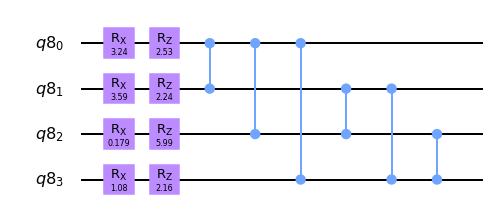

In [9]:

# Let's take a look at Layer 1 circuit 
simulations_case3["sim0"].draw('mpl')


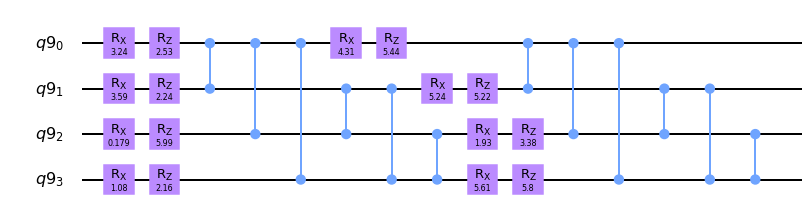

In [10]:

# Now the circuit for Layer 2  
simulations_case3["sim1"].draw('mpl')


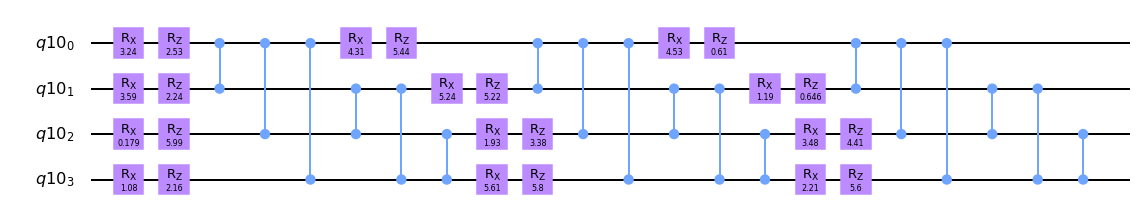

In [11]:

# Finally the circuit for Later 3 
simulations_case3["sim2"].draw('mpl')


<br>
<br>
<br>
<br>
<br>

# Execution and Analysis of the Simulations

In [12]:

# Here we obtain the final state after executing the simulation
states_case3 = {"state"+str(i): execute(simulations_case3["sim"+str(i)], backend).result().get_statevector() for i in range(0, MAXIMUM_NUM_LAYERS)}


In [13]:

# Let's take a look at the state of Layer 1
print(states_case3["state0"])


[ 5.45339686e-03-8.01346903e-03j -1.87969614e-01+2.24529184e-03j
 -4.10288216e-02+1.26713721e-02j -6.56986757e-01-5.11752310e-01j
 -8.30201297e-04-2.58134451e-04j -5.11190347e-03-1.60673193e-02j
 -2.16083720e-03-3.18828158e-03j -2.67099461e-02+6.97563428e-02j
  5.37106020e-03-2.17618157e-03j  9.42329616e-02+6.12494049e-02j
  2.46101838e-02+7.31068713e-03j -1.56963528e-01-4.72504097e-01j
  3.27260426e-04+4.03836040e-04j  2.78850750e-03-9.68726319e-03j
 -1.68729806e-05-2.30265459e-03j  3.64287159e-02-2.58317569e-02j]


In [14]:

# Stores the "distances" for each layer in an array for further analysis
y_case3 = [np.linalg.norm(states_case3["state"+str(i)] - phi) for i in range(0, MAXIMUM_NUM_LAYERS)]


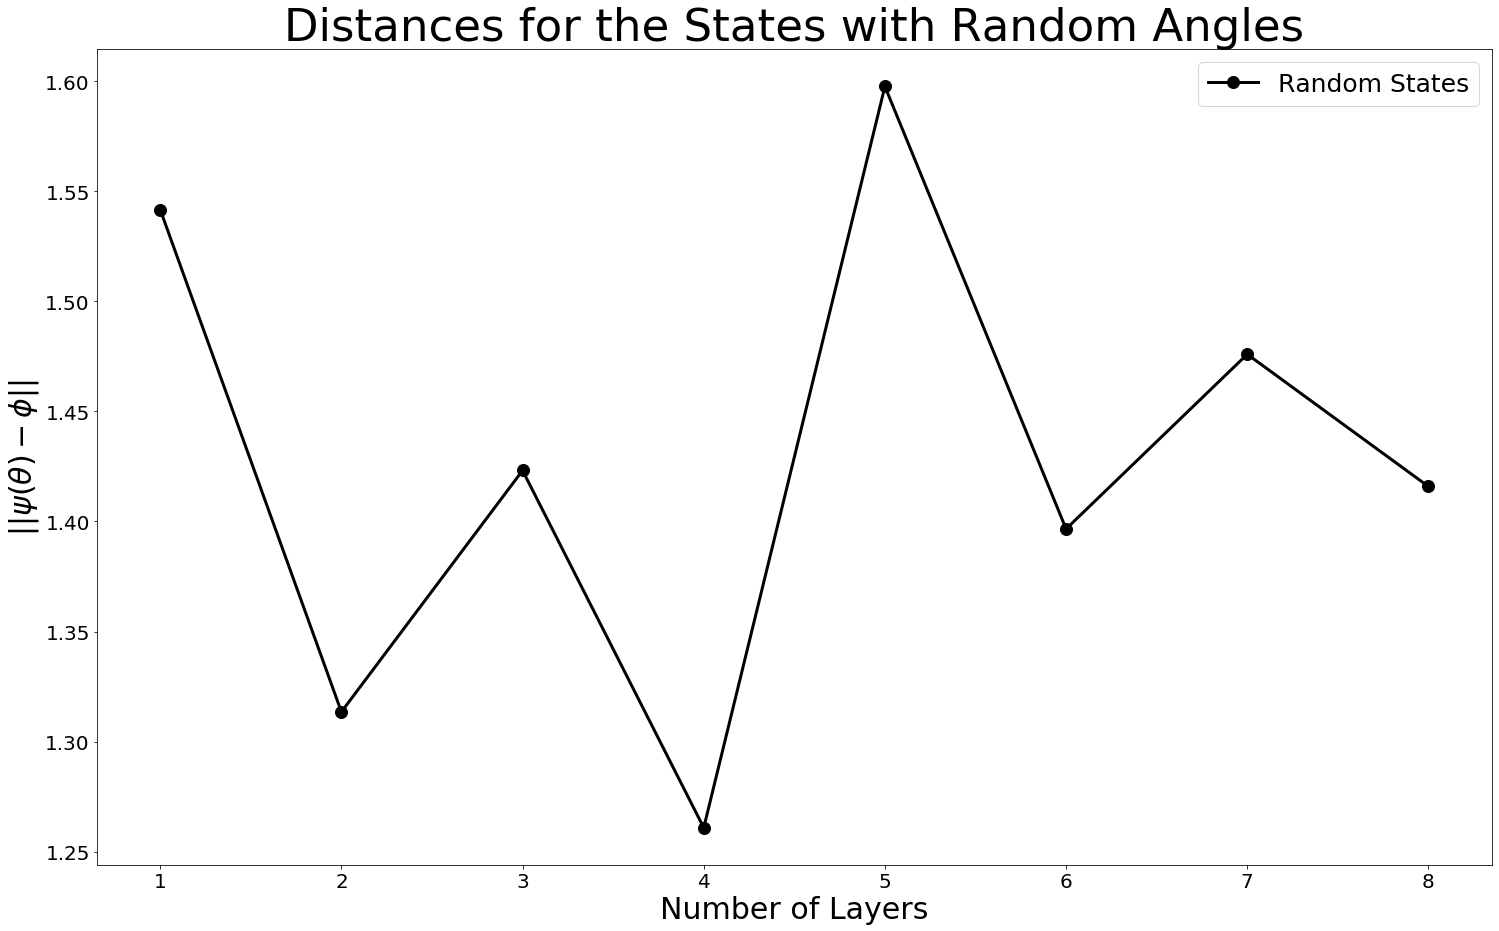

In [15]:

plt.figure(figsize=(25,15))
plt.plot([i for i in range(1, MAXIMUM_NUM_LAYERS+1)], y_case3, '-o', linewidth=3, 
         c='k', markersize=12, label='Random States')

plt.title('Distances for the States with Random Angles', fontsize=45)
plt.xlabel(r'Number of Layers', fontsize=30)
plt.ylabel(r'$\|\|\psi(\theta) - \phi\|\|$', fontsize=30)
plt.legend(loc='best', fontsize=25)

plt.xticks(np.arange(1, MAXIMUM_NUM_LAYERS+1, step=1))
plt.show()


For the random angles, is obvious that what we get are just random states with not a clear trend.

<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Optimization of the Variational Parameters

The following optimization is a "UNIVERSAL" optimization, what I mean by this is that it receives 8 variational parameters per layer and optimizes all of them together at the same time. I have decided to do the implementation this way because the parameters are all correlated. The input state for layer N is the output from layer N-1, sending its output to the N+1 layer. 

In this regard, the optimized parameters for layer N for simulation M will be different from the optimized parameters for the same layer for simulation M+1. Here the simulation M includes circuits for up to M layers. 

The other kind of optimization possible, let's call it "SEQUENTIAL", in which we optimize layer N-1 only once and pass it to layer N for all of the M simulations, would, of course, give a different performance, a worse one the author of this Notebook believes. 

So in what follows the analysis and discussion is focused solely on the "UNIVERSAL" optimization. 


In [16]:

# Here we optimize the initial random angles
optimized_angles_case3 = {"layer"+str(l): optimization_case3(l, odd_angles[:l+1],  even_angles[:l+1]) for l in trange(MAXIMUM_NUM_LAYERS)}


100%|██████████| 8/8 [1:05:33<00:00, 491.67s/it]


<br>

To verify the point make in the introduccion of this section, let's take a look at the optimized "ODD" angles for layer "0" for simulations 0 and 1. 

In [17]:

print("\t Optimized Angles for Layer 0.")
for i in range(4):
    print("Simulation 0: {:.4f} | Simulation 1: {:.4f} ".format(optimized_angles_case3["layer0"][0][0][i], optimized_angles_case3["layer1"][0][0][i]))


	 Optimized Angles for Layer 0.
Simulation 0: 5.8559 | Simulation 1: 4.5220 
Simulation 0: 4.3523 | Simulation 1: 1.4131 
Simulation 0: 0.0000 | Simulation 1: 1.4335 
Simulation 0: 1.9132 | Simulation 1: 1.7577 


As you can see, the angles (in radians) differ substantially from one another, even thou they belong to the same layer define in the same way! As discussed before, this is due to the influence of the angles from layer 1 in simulation 1, that do not exist in simulation 0. 

This is the correlation of the variables in action and further work should explore how this correlation affects the performance due to the high cost of the simulation for the "UNIVERSAL" optimization of circuits with a high number of layers. 

<br>
<br>
<br>
<br>

# Initialize the simulations with Optimized Parameters

In [18]:

# Define new registers for the optimized case
opt_registers_case3 = {"q"+str(i): QuantumRegister(4) for i in range(0, MAXIMUM_NUM_LAYERS)}


In [19]:

# Define new circuits for the optimized case
opt_circuits_case3 = {"qc"+str(i): QuantumCircuit(opt_registers_case3["q"+str(i)]) for i in range(0, MAXIMUM_NUM_LAYERS)}


In [20]:

# Set up the simulations with all of the optimized angles for the all layers
opt_simulations_case3 = {"sim"+str(i): simulation(opt_registers_case3["q"+str(i)], opt_circuits_case3["qc"+str(i)], i+1, optimized_angles_case3["layer"+str(i)][0], optimized_angles_case3["layer"+str(i)][1], 3).build_case3() for i in range(0, MAXIMUM_NUM_LAYERS)}


With regard to the discussion about the different optimized parameters of before, we can observe the circuits for the optimized cases and compare the angles in the fist layer. 

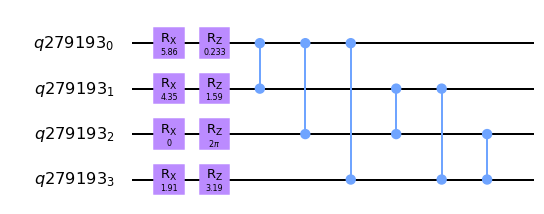

In [21]:
opt_simulations_case3["sim0"].draw('mpl')

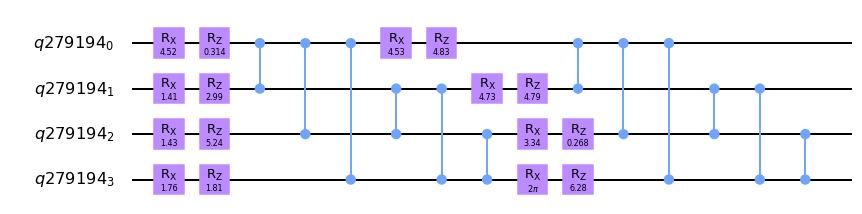

In [22]:
opt_simulations_case3["sim1"].draw('mpl')

In [23]:

# Get and store all of the optimized states in a dictionary for easy reference and access 
opt_states_case3 = {"state"+str(i): execute(opt_simulations_case3["sim"+str(i)], backend).result().get_statevector() for i in range(0, MAXIMUM_NUM_LAYERS)}


In [24]:

# Stores the optimized distances in an array for further analysis
opt_y_case3 = [np.linalg.norm(opt_states_case3["state"+str(i)] - phi) for i in range(0, MAXIMUM_NUM_LAYERS)]


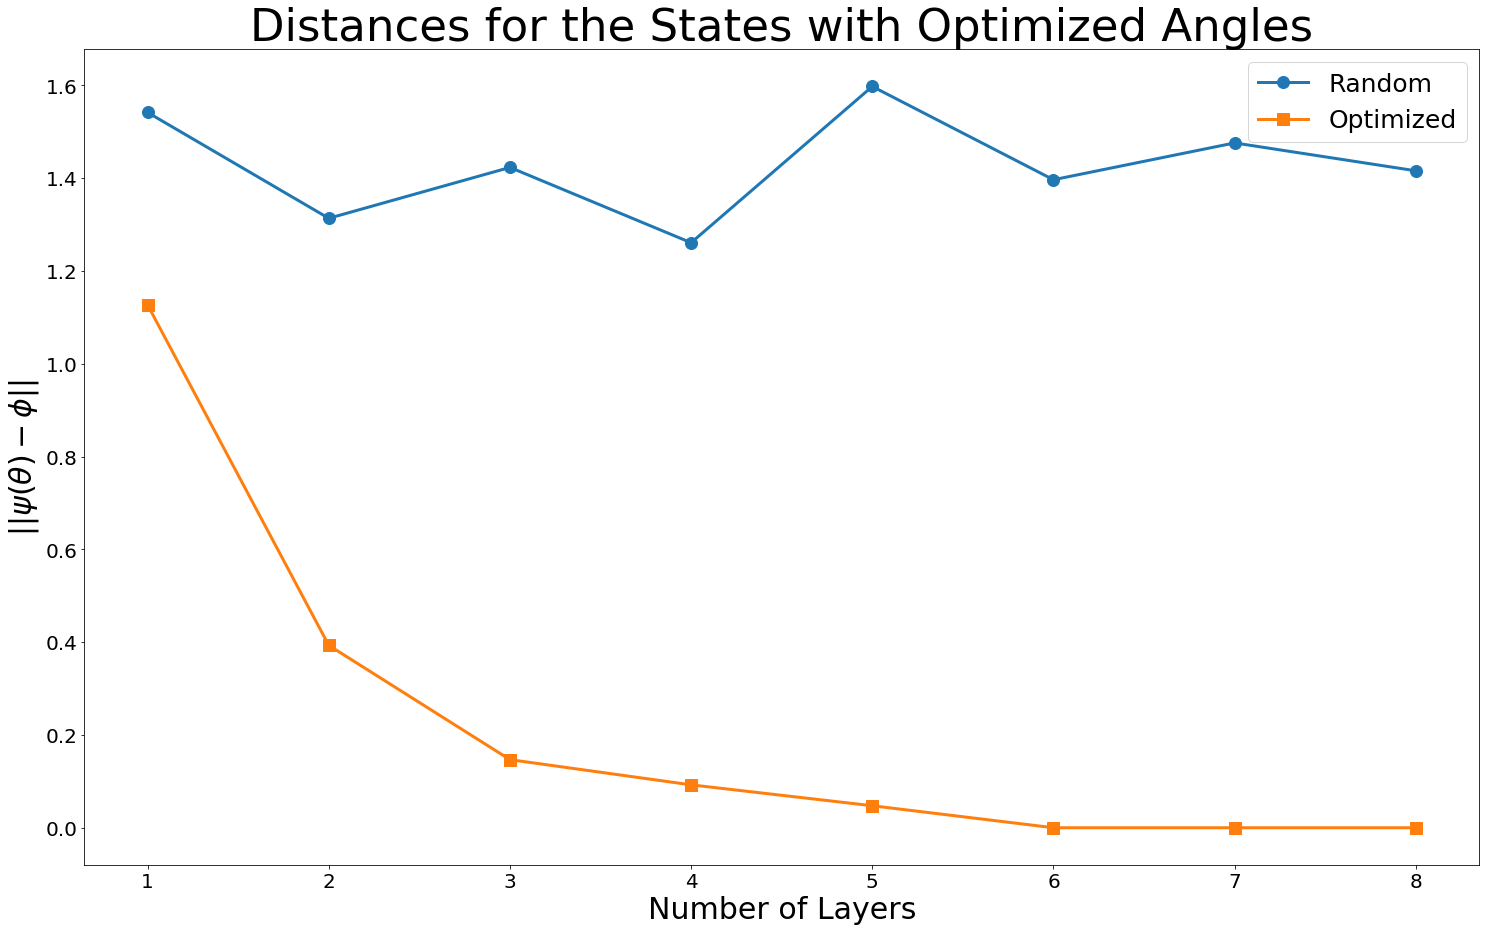

In [25]:

plt.figure(figsize=(25,15))
plt.plot([i for i in range(1, MAXIMUM_NUM_LAYERS+1)], y_case3,     '-o', linewidth=3, 
         markersize=12, label='Random')
plt.plot([i for i in range(1, MAXIMUM_NUM_LAYERS+1)], opt_y_case3, '-s', linewidth=3, 
         markersize=12, label='Optimized')


plt.title('Distances for the States with Optimized Angles', fontsize=45)
plt.xlabel(r'Number of Layers', fontsize=30)
plt.ylabel(r'$\|\|\psi(\theta) - \phi\|\|$', fontsize=30)
plt.legend(loc='best', fontsize=25)


plt.xticks(np.arange(1, MAXIMUM_NUM_LAYERS+1, step=1))
plt.show()


<br>

We observe a clear trend for the optimized parameters. As the number of layers increases so does the performance of our simulation. From one to two layers we more than double their performance of the circuit; then we observe a steady convergence towards zero. Of course, we may expect that as the distance for two vector states decreases, they become more similar to each other. Let's take a look at the evolution of the first and last complex entries defining the final state for each simulation.

<br>

In [80]:

print("\t    First Entry")
for i in range(MAXIMUM_NUM_LAYERS):
    print("simulation "+str(i)+": {:.6f} + {:.6f}j".format(opt_states_case3["state"+str(i)][0].real, opt_states_case3["state"+str(i)][0].imag))
print("Reference   : {:.6f} + {:.6f}j".format(phi[0].real, phi[0].imag))

print("\n")

print("\t    Last Entry")
for i in range(MAXIMUM_NUM_LAYERS):
    print("simulation "+str(i)+": {:.6f} + {:.6f}j".format(opt_states_case3["state"+str(i)][-1].real, opt_states_case3["state"+str(i)][-1].imag))
print("Reference   : {:.6f} + {:.6f}j".format(phi[-1].real, phi[-1].imag))


	    First Entry
simulation 0: 0.161953 + -0.276557j
simulation 1: 0.153094 + 0.089967j
simulation 2: 0.176541 + 0.017014j
simulation 3: 0.165423 + 0.029004j
simulation 4: 0.171733 + 0.036110j
simulation 5: 0.155751 + 0.025203j
simulation 6: 0.155751 + 0.025203j
simulation 7: 0.155751 + 0.025203j
Reference   : 0.155751 + 0.025203j


	    Last Entry
simulation 0: 0.000000 + 0.000000j
simulation 1: 0.122496 + 0.217737j
simulation 2: 0.071446 + 0.211314j
simulation 3: 0.046927 + 0.238716j
simulation 4: 0.081712 + 0.242143j
simulation 5: 0.070080 + 0.243677j
simulation 6: 0.070080 + 0.243677j
simulation 7: 0.070080 + 0.243677j
Reference   : 0.070080 + 0.243677j


Within 6 decimals of precision, we can see that once we reach the sixth layer of the simulation, we pretty much reproduce the random refernce state, or what is the same, we have minimize the distance between the states and the norm of their difference is < 1e6. 

Therefore, for this particular architecture of the ayers, six of them are enough to reach the minima. Additionally, we visualize the evlution of final states throug out the simulations in a series of "City Plots". 

In [ ]:
from qiskit.visualization import plot_state_city

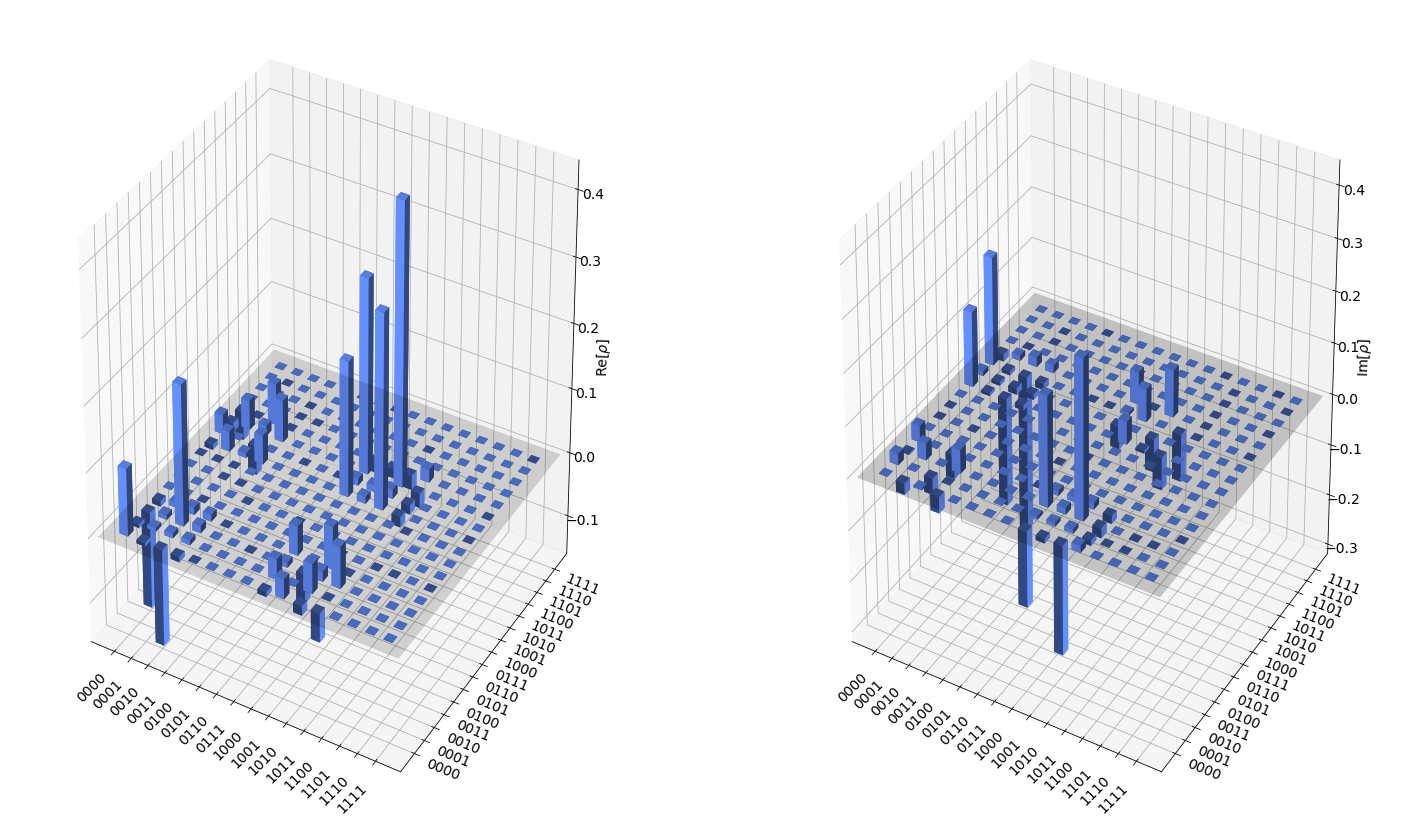

In [83]:

plot_state_city(opt_states_case3["state0"], figsize=(25, 15))


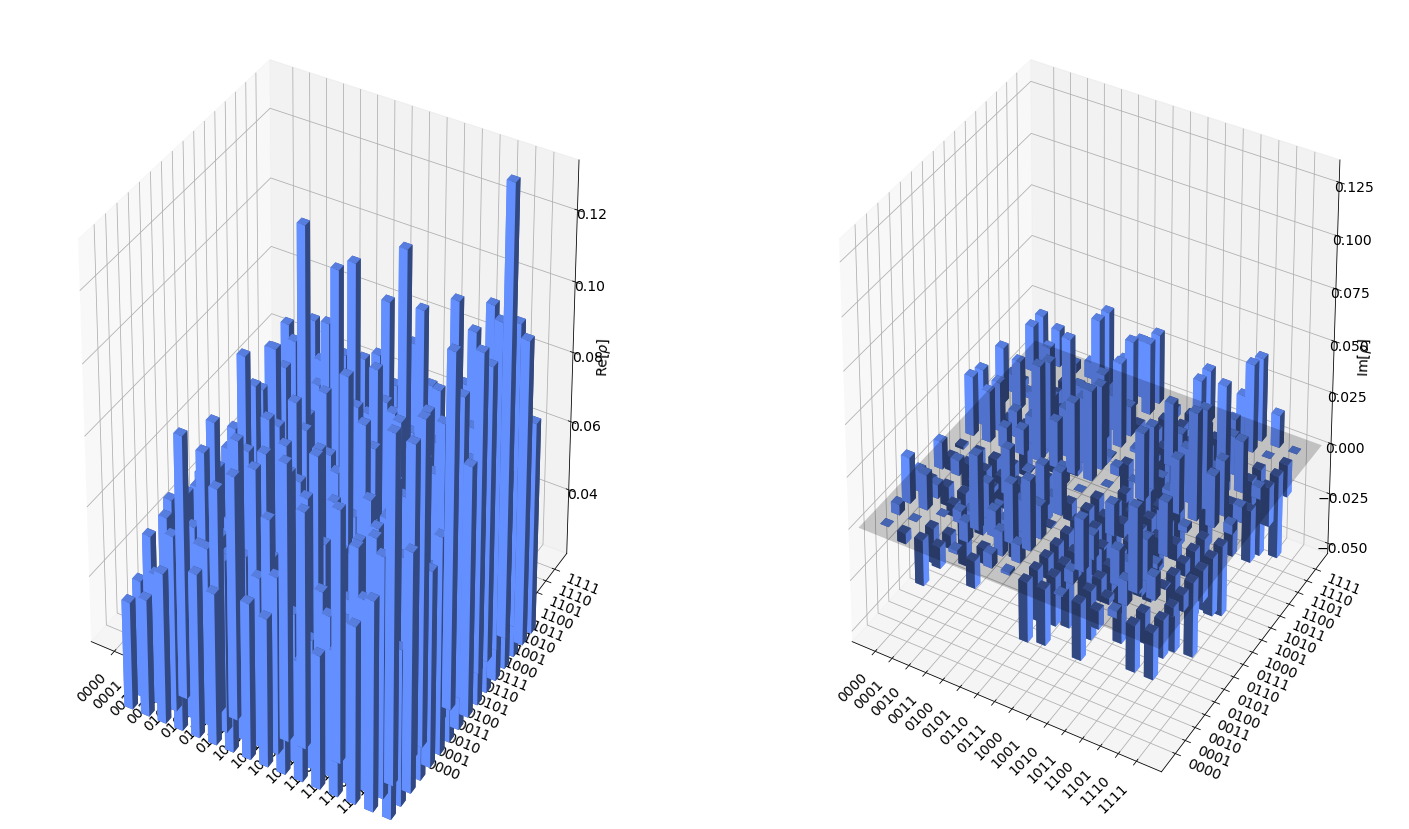

In [84]:

plot_state_city(opt_states_case3["state1"], figsize=(25, 15))


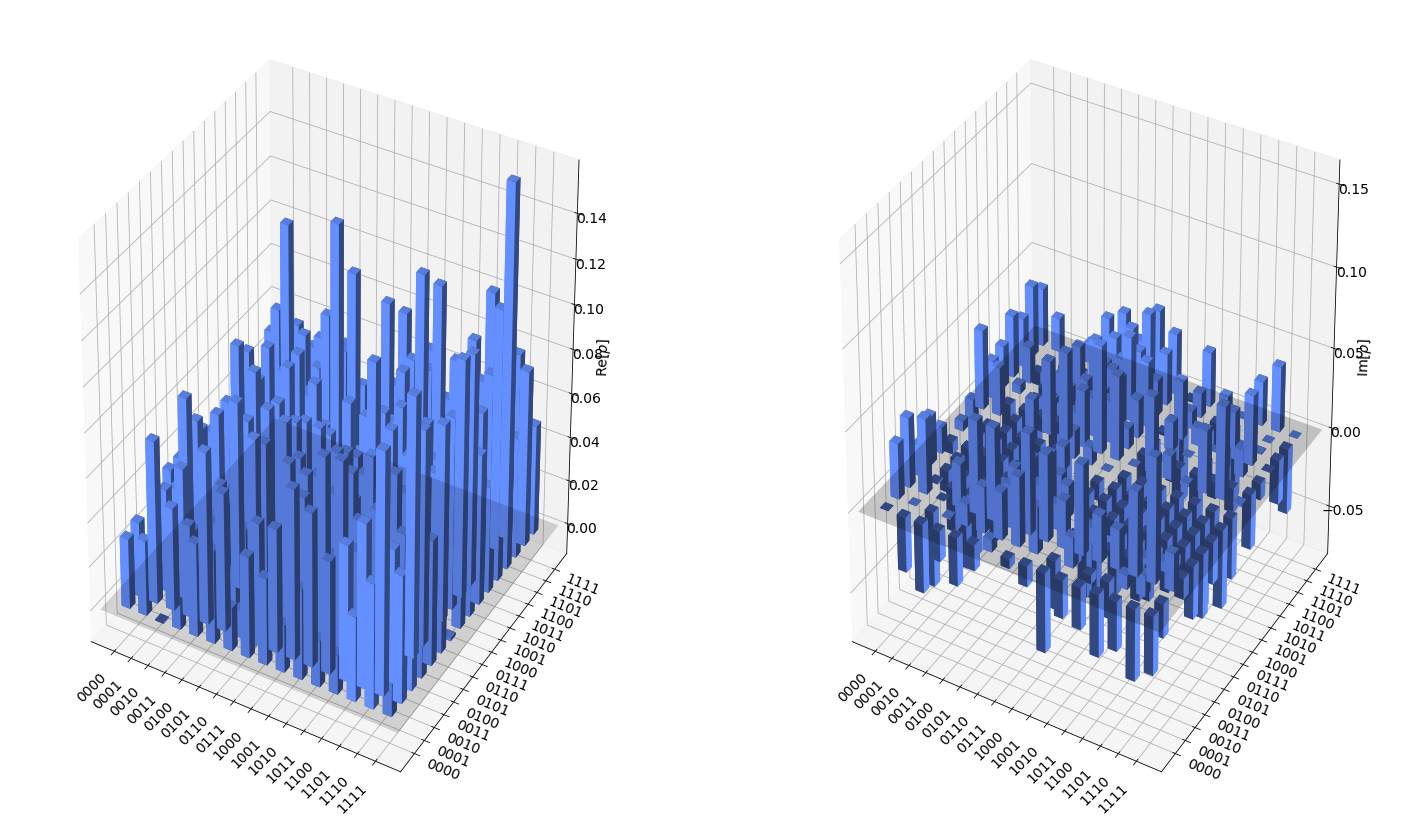

In [85]:

plot_state_city(opt_states_case3["state2"], figsize=(25, 15))


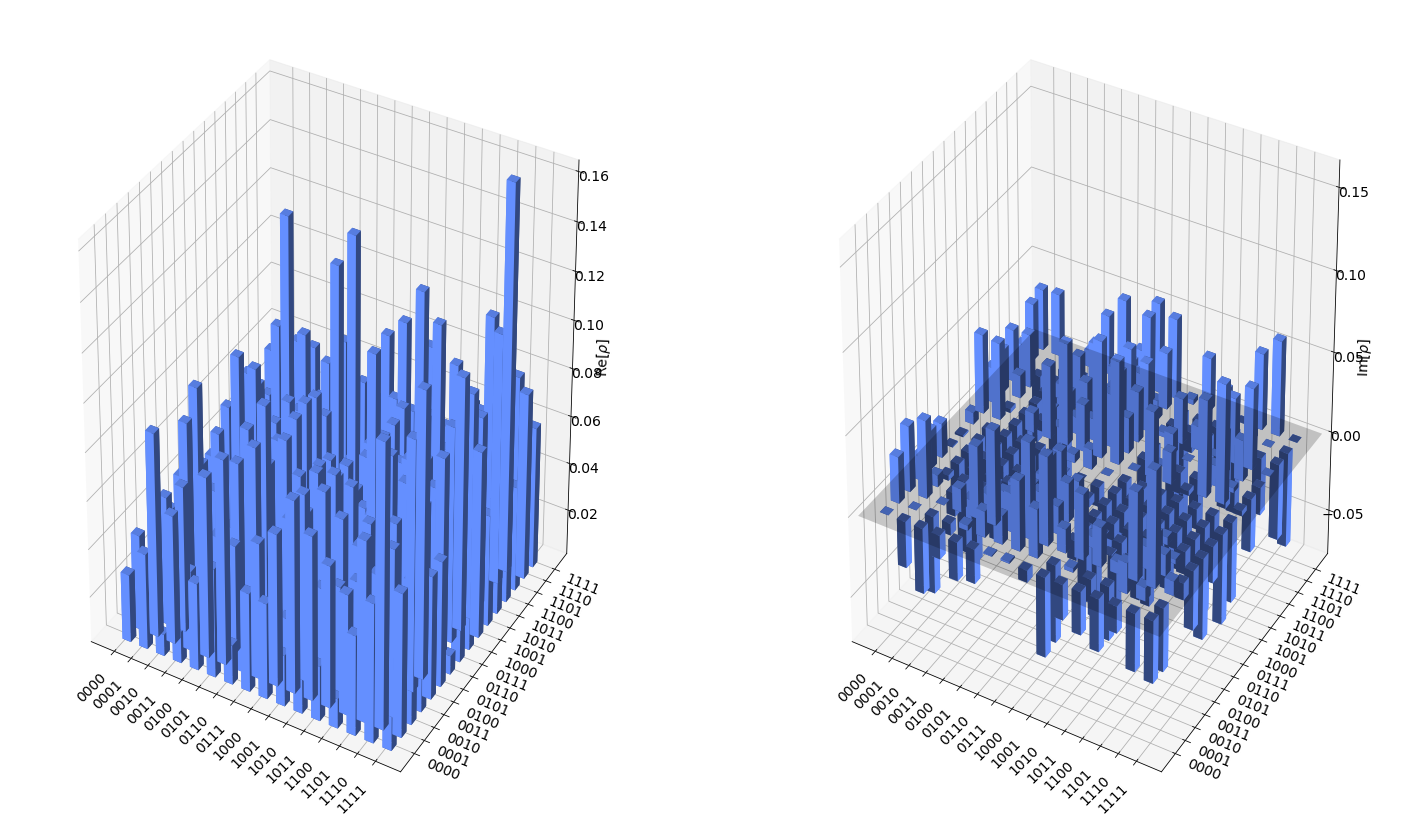

In [86]:

plot_state_city(opt_states_case3["state3"], figsize=(25, 15))


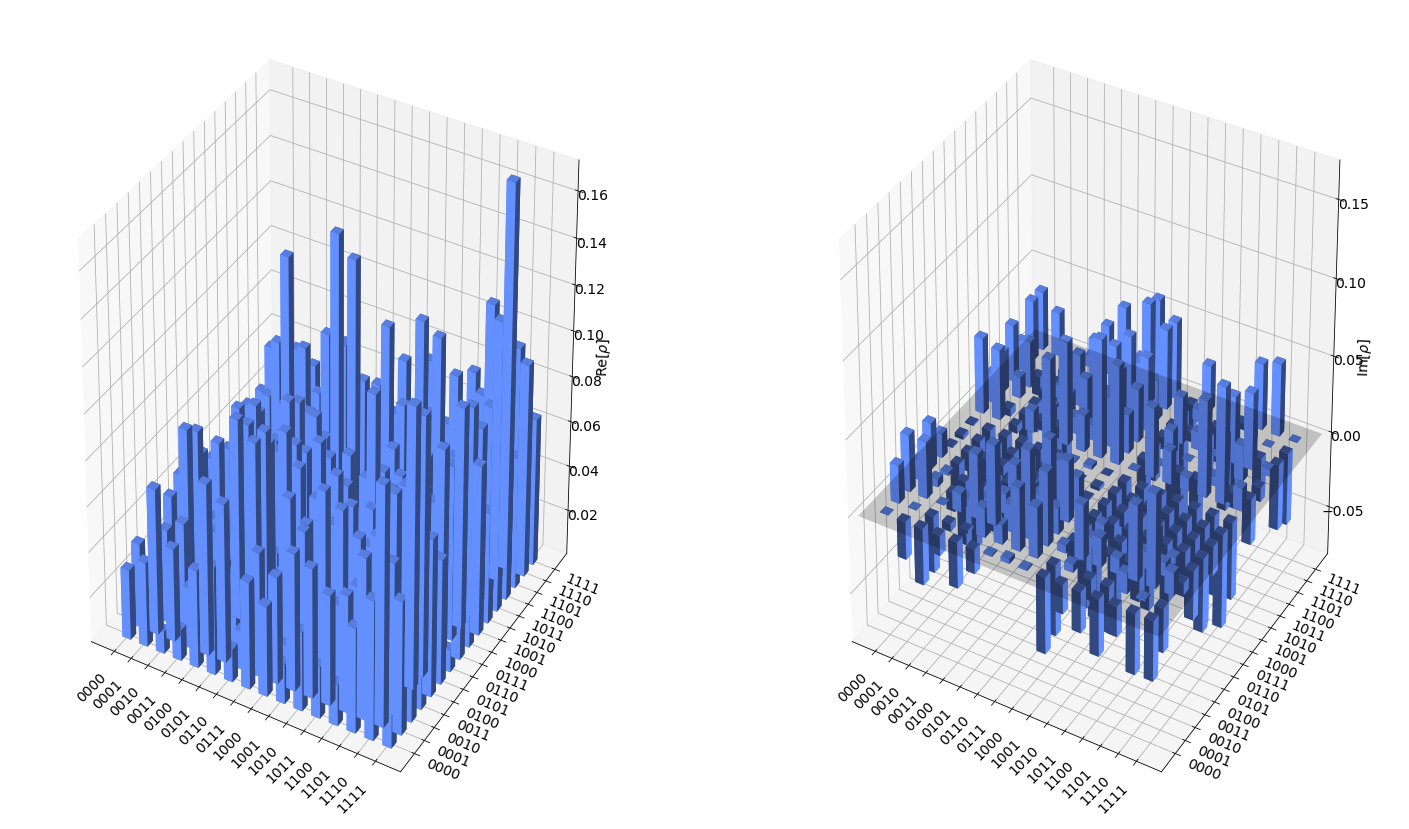

In [87]:

plot_state_city(opt_states_case3["state4"], figsize=(25, 15))


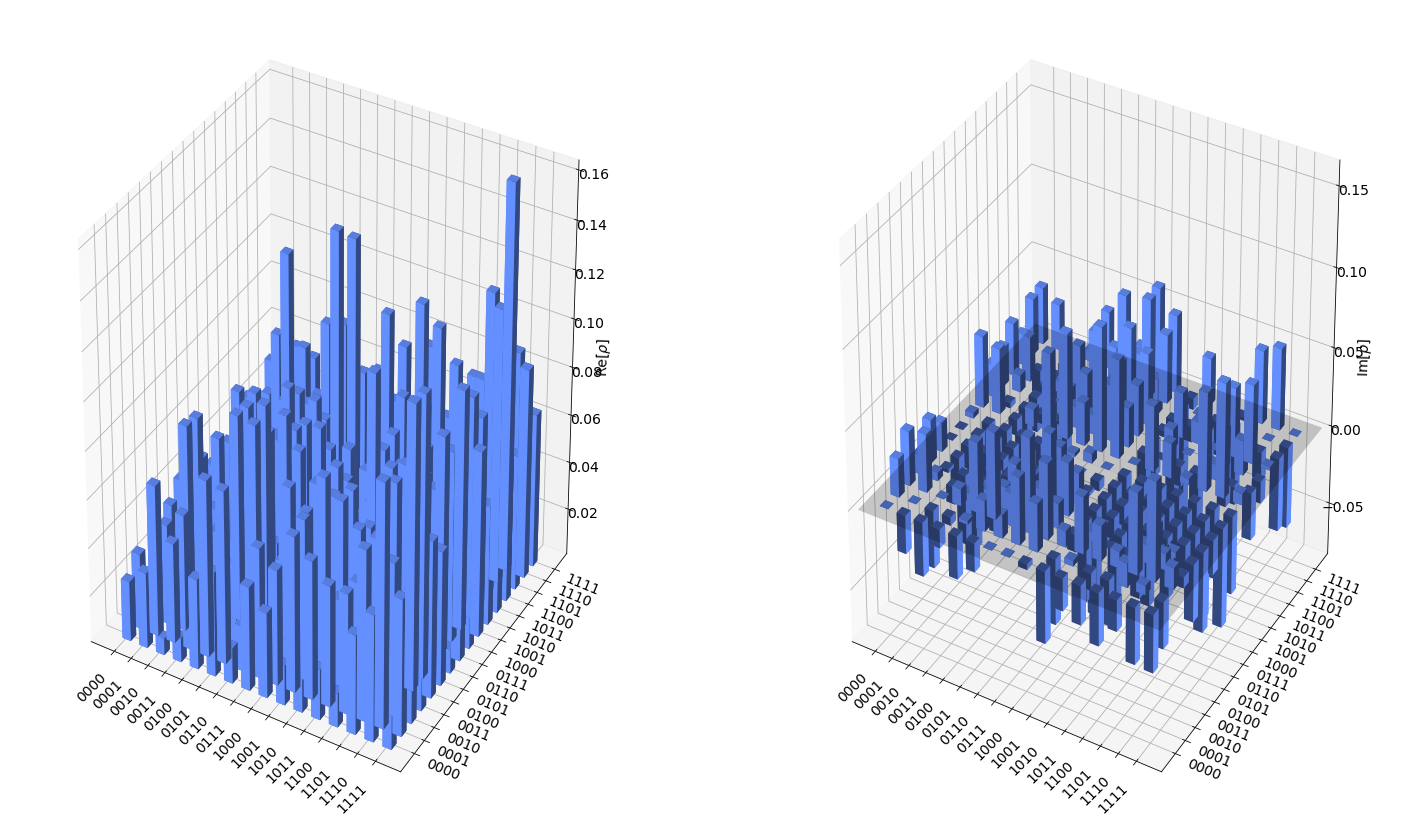

In [88]:

plot_state_city(opt_states_case3["state5"], figsize=(25, 15))


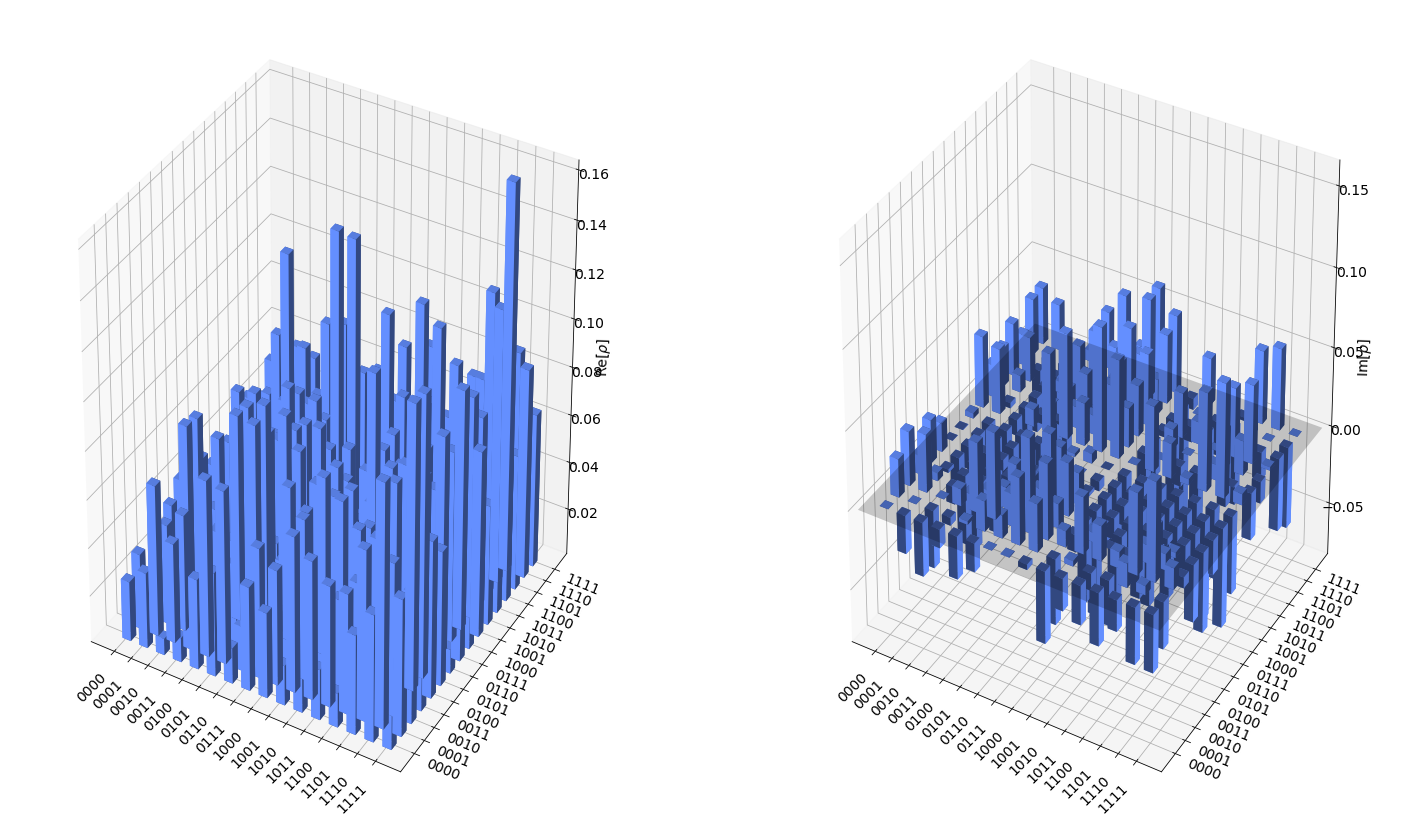

In [89]:

plot_state_city(opt_states_case3["state6"], figsize=(25, 15))


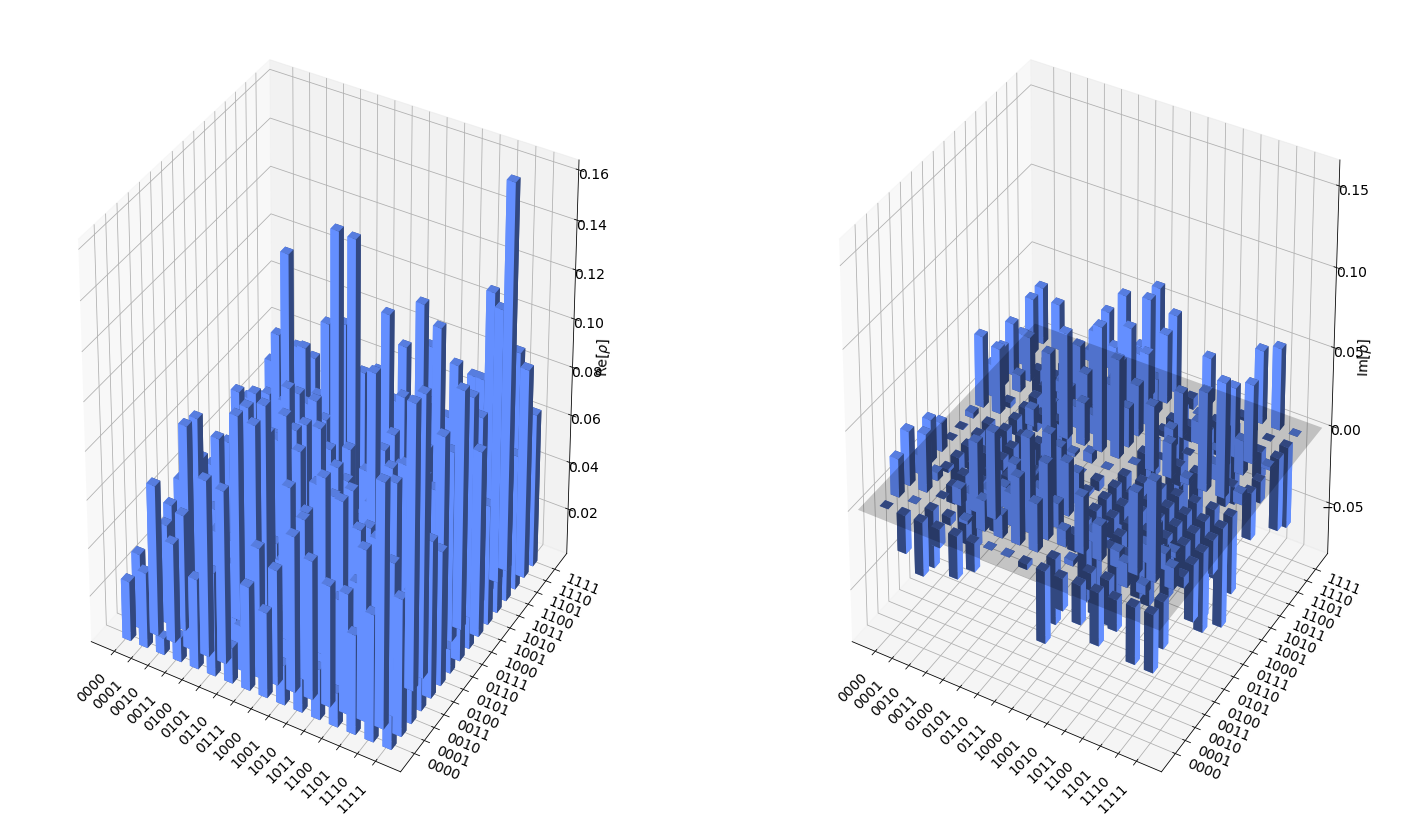

In [90]:

plot_state_city(opt_states_case3["state7"], figsize=(25, 15))


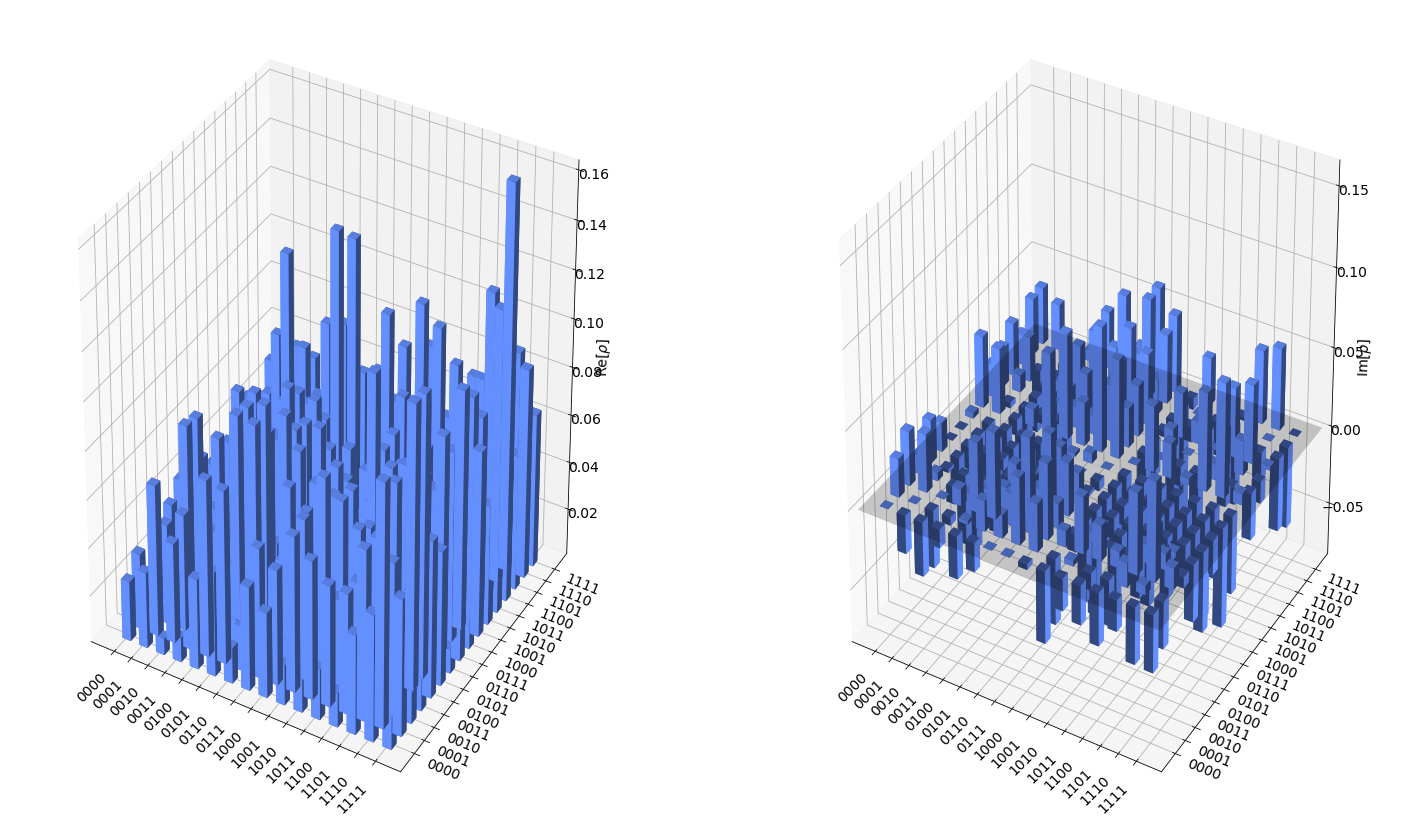

In [91]:

plot_state_city(phi, figsize=(25, 15))


# Perspectives

    I) Analyze a "SEQUENTIAL" optimization and compare it against the "UNIVERSAL" one presented in this notebook.
    
    II) Explore different architectures for the circuits. 
    
    II) Explore other gates for the circuits.
    
    III) Combine different architectures and gates.
    
    IV) Could a machine learning algorithm find optimal architecture and composition (gates) for the simulations? What kind of algorithm would that be?